In [1]:
import torch
import matplotlib.pyplot as plt
from torchvision.io import read_image, ImageReadMode

In [2]:
def show_image(x: torch.Tensor, ax=None):
    if ax is None:
        plt.imshow(x.permute(1, 2, 0))
    else:
        ax.imshow(x.permute(1, 2, 0))

torch.Size([3, 400, 400])


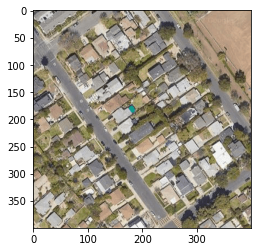

In [3]:
x = read_image("../data/training/images/satimage_1.png", ImageReadMode.RGB).float() / 255
print(x.shape)
show_image(x)

In [4]:
P = 16
H = x.shape[-2]
W = x.shape[-1]

torch.Size([3, 25, 25, 16, 16])


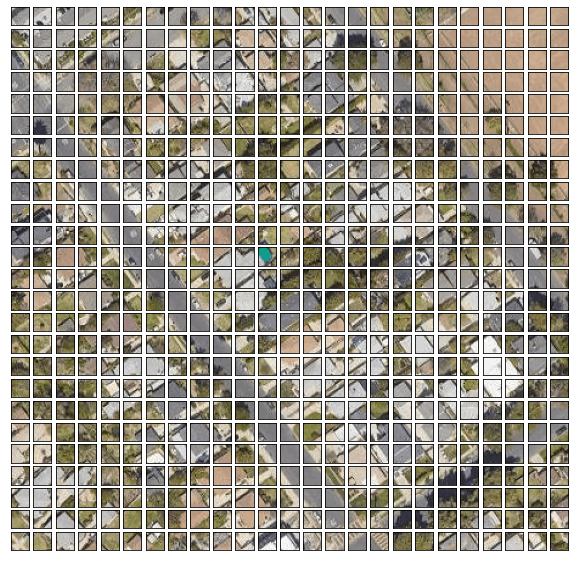

In [5]:
patches = x.unfold(-2, P, P).unfold(-2, P, P)
print(patches.shape)

figure, axis = plt.subplots(H // P, W // P, figsize=(10, 10))

for i in range(H // P):
    for j in range(W // P):
        show_image(patches[:, i, j], axis[i][j])
        axis[i][j].set_xticks([])
        axis[i][j].set_yticks([])

plt.show()

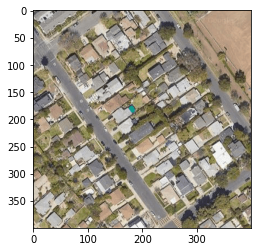

In [6]:
x_reconstructed = patches.transpose(-3, -2).flatten(-4, -3).flatten(-2, -1)
show_image(x_reconstructed)